In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# making the synthetic dataset
from sklearn.datasets import make_classification

In [3]:
X,y = make_classification(n_samples=1000,n_features=2,n_classes=2,n_clusters_per_class=1,n_redundant=0)

In [4]:
X

array([[ 0.33122054,  2.23617449],
       [ 1.80505995, -1.21864862],
       [ 1.70608872, -1.71580852],
       ...,
       [ 1.34708167, -0.02813441],
       [ 0.5825192 ,  0.32280323],
       [ 1.30864402,  0.93262847]], shape=(1000, 2))

In [5]:
y

array([0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,

In [ ]:
pd.DataFrame(X)

,0,1
0,0.331221,2.236174
1,1.805060,-1.218649
2,1.706089,-1.715809
3,0.211192,1.718041
4,1.862605,-2.081602
...,...,...
995,1.188278,-0.414723
996,0.457027,1.749439
997,1.347082,-0.028134
998,0.582519,0.322803


<Axes: xlabel='0', ylabel='1'>

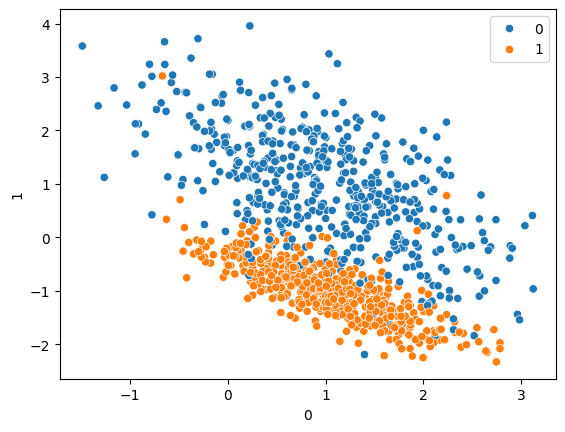

In [8]:
sns.scatterplot(x=pd.DataFrame(X)[0],y=pd.DataFrame(X)[1],hue=y)

### Try changing n_clusters_per_class parameter , the plot will be different and again test with different kernels below

In [11]:
from sklearn.model_selection import train_test_split

In [13]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=10)

In [9]:
# SVC
from sklearn.svm import SVC

In [10]:
svc = SVC(kernel = "linear")

In [14]:
svc.fit(X_train,y_train)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [15]:
#prediction 
y_pred = svc.predict(X_test)

In [16]:
# evaluation
from sklearn.metrics import classification_report,confusion_matrix

In [17]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.90      0.94       126
           1       0.91      0.98      0.94       124

    accuracy                           0.94       250
   macro avg       0.94      0.94      0.94       250
weighted avg       0.94      0.94      0.94       250

[[114  12]
 [  3 121]]


In [18]:
# testing rbf kernel
svc_rbf = SVC(kernel = "rbf")

In [19]:
svc_rbf.fit(X_train,y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [22]:
y_pred1 = svc_rbf.predict(X_test)

In [23]:
print(classification_report(y_test,y_pred1)) 
print(confusion_matrix(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.98      0.88      0.93       126
           1       0.89      0.98      0.93       124

    accuracy                           0.93       250
   macro avg       0.94      0.93      0.93       250
weighted avg       0.94      0.93      0.93       250

[[111  15]
 [  2 122]]


In [25]:
# testing polynomial kernel
poly_svc = SVC(kernel = "poly")
poly_svc.fit(X_train,y_train)
#predict
y_pred2 = poly_svc.predict(X_test)
#evaluation
print(classification_report(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.98      0.82      0.89       126
           1       0.84      0.98      0.91       124

    accuracy                           0.90       250
   macro avg       0.91      0.90      0.90       250
weighted avg       0.91      0.90      0.90       250

[[103  23]
 [  2 122]]


In [26]:
# testing sigmoid kernel
sig_svc = SVC(kernel = "sigmoid")
sig_svc.fit(X_train,y_train)    
#predict
y_pred3 = sig_svc.predict(X_test)
#evaluation
print(classification_report(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.88      0.86      0.87       126
           1       0.86      0.88      0.87       124

    accuracy                           0.87       250
   macro avg       0.87      0.87      0.87       250
weighted avg       0.87      0.87      0.87       250

[[108  18]
 [ 15 109]]


## Hyperparameter Tuning With SVC

In [33]:
# hyperparameter tuning
from sklearn.model_selection import GridSearchCV
#defining parameter range
param_grid = {'C' : [0.1,1,10,100,1000],
              'gamma' : [1,0.1,0.01,0.001,0.0001],
              'kernel' : ['linear','rbf','poly','sigmoid']}

In [34]:
grid  = GridSearchCV(SVC(),param_grid = param_grid,refit = True,cv = 5,verbose = 3)

In [35]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.967 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.940 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.927 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.940 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.940 total time=   0.0s
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.960 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.940 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.927 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.947 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.947 total time=   0.0s
[CV 1/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.907 total time=   0.0s
[CV 2/5] END .......C=0.1, gamma=1, kernel=pol

,estimator,SVC()
,param_grid,"{'C': [0.1, 1, ...], 'gamma': [1, 0.1, ...], 'kernel': ['linear', 'rbf', ...]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,3
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,C,100


In [36]:
grid.best_params_

{'C': 100, 'gamma': 1, 'kernel': 'rbf'}

In [37]:
#prediction
y_pred3 = grid.predict(X_test)
#evalutaion
print(classification_report(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.97      0.89      0.93       126
           1       0.90      0.98      0.93       124

    accuracy                           0.93       250
   macro avg       0.94      0.93      0.93       250
weighted avg       0.94      0.93      0.93       250

[[112  14]
 [  3 121]]
